# ML Factor analysis

#### Default import 

(not all deployed)

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series, ExcelWriter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import random
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, f1_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score,r2_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.model_selection import cross_validate, ShuffleSplit, learning_curve
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import warnings
from sklearn.ensemble import AdaBoostClassifier
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import NuSVC
import xlwt
from openpyxl import load_workbook
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
pd.set_option('display.max_rows', 1000)
from sklearn.utils.multiclass import unique_labels

## Data Curation

#### Read the dataset

In [29]:
df = pd.read_excel('dataSandwichDef.xlsx')
df

,REF_DATE,SEDOLCHK,SIMPLE_TOT_RET,COMPOUND_TOT_RET,FIVE_YR_VOLATILITY_M,FIVE_YR_VOLATILITY_W,ADY,AERR,AGRE,APE,...,REV_STD_MARK,ROE,TRL_ECM,TRL_GRE,TURNOVER_1M,UL_SALES,PB/PCF1,PB/PCF2,ICB_INDUSTRY_NUM,ICB_SECTOR_NUM
0,20050429,0028262,0.014546,0.015183,0.374144,0.410857,0.034056,0.583228,0.038748,12.237950,...,0.000047,0.228026,-0.008689,0.039583,13.45278,0.025476,6.840467,6.840467,1,570
1,20050429,0038614,0.043240,0.043240,0.243429,0.240235,0.058831,0.424596,0.069312,9.780680,...,-0.000095,0.203544,0.006073,0.033105,34.52257,0.409729,1.914199,1.914199,8000,8350
2,20050429,0044473,0.043979,0.043979,0.457628,0.457729,0.033439,0.485167,0.058342,15.396250,...,0.000264,NaN,-0.166107,0.168180,35.39919,0.072399,21.041570,21.041570,5000,5550
3,20050429,0045614,0.062633,0.064127,0.330014,0.296963,0.038021,0.720774,1.868184,7.344045,...,-0.000095,0.270775,-0.021343,-0.174962,20.17821,0.602459,5.907725,5.907725,1000,1770
4,20050429,0047245,0.063380,0.063380,0.380265,0.394760,0.049925,0.411554,0.040607,11.786590,...,-0.000490,0.165902,0.003204,0.036071,41.79630,0.049196,7.831871,7.831871,5000,5370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102181,20190628,BZ57390,-0.012200,-0.012200,0.263600,0.257200,0.066700,0.509600,0.083200,7.350000,...,-0.000400,0.095000,-0.017300,-0.019300,153.35900,0.400000,0.730000,0.730000,8000,8350
102182,20190628,BZ5ZHK3,0.028100,0.028100,0.248400,0.282000,0.034100,0.683900,0.447400,9.280000,...,0.000500,0.120800,0.118600,0.071200,12.66710,0.100000,5.920000,5.920000,3000,3350
102183,20190628,BZ6CZ43,0.049600,0.049600,0.245300,0.238300,0.033800,NaN,-1.789800,NaN,...,0.001100,0.039500,0.938300,NaN,13.02210,0.000000,10.280000,10.280000,7000,7570
102184,20190628,BZCNB42,0.092500,0.092500,0.340700,0.357300,0.000000,NaN,0.402800,NaN,...,-0.002400,-0.328800,-0.258000,-0.068100,17.52780,-0.400000,NaN,NaN,5000,5370


#### Initially, the DataFrame' shape is:

In [30]:
df.shape

(102186, 71)

#### A brief descriptive statistics

In [31]:
df.describe()

,REF_DATE,SIMPLE_TOT_RET,COMPOUND_TOT_RET,FIVE_YR_VOLATILITY_M,FIVE_YR_VOLATILITY_W,ADY,AERR,AGRE,APE,CGR,...,REV_STD_MARK,ROE,TRL_ECM,TRL_GRE,TURNOVER_1M,UL_SALES,PB/PCF1,PB/PCF2,ICB_INDUSTRY_NUM,ICB_SECTOR_NUM
count,1.021860e+05,102123.000000,102123.000000,102117.000000,102166.000000,101725.000000,97696.000000,98359.000000,98655.000000,91737.000000,...,101522.000000,100096.000000,100917.000000,99730.000000,102181.000000,100817.000000,100402.000000,95690.000000,102186.000000,102186.000000
mean,2.011952e+07,0.007547,0.007559,0.294503,0.318929,0.032016,0.534007,0.100637,21.444112,0.087949,...,0.000170,0.348933,-0.014937,0.274704,48.888685,0.312801,11.413676,19.358099,4546.132171,5123.688989
std,4.130217e+04,0.089001,0.089089,0.122787,0.123919,0.024878,0.251277,6.737749,201.648041,0.161897,...,0.048378,28.760040,6.082885,8.235621,87.572134,21.016170,182.832468,1502.180461,2766.850720,2739.592965
min,2.005043e+07,-0.966300,-0.966300,0.004800,0.022600,0.000000,0.000000,-644.973400,0.330000,-0.740100,...,-2.176300,-63.500000,-1585.904000,-56.254700,0.189400,-215.900000,0.030000,0.030000,1.000000,530.000000
25%,2.008103e+07,-0.037400,-0.037400,0.210600,0.236100,0.017300,0.395100,-0.045200,11.730000,0.011200,...,-0.000300,0.092300,-0.020100,0.031900,9.128900,0.100000,3.510000,5.910000,2000.000000,2750.000000
50%,2.012053e+07,0.009100,0.009100,0.266600,0.291300,0.028500,0.560800,0.077100,15.630000,0.076500,...,0.000300,0.143900,0.019100,0.095500,20.311400,0.100000,7.980000,9.610000,4000.000000,4570.000000
75%,2.015123e+07,0.054900,0.055000,0.345800,0.371300,0.042700,0.691600,0.209900,20.943230,0.143300,...,0.000800,0.206900,0.056900,0.169300,49.226300,0.200000,12.710000,14.370000,8000.000000,8350.000000
max,2.019063e+07,1.694300,1.694300,1.412344,2.517600,1.205400,1.000000,220.160300,38766.150000,2.504540,...,13.427800,8831.764000,504.193800,1844.659000,2571.911000,6310.000000,26172.750000,460769.000000,9000.000000,9570.000000


#### Info on the type of each column and the number of non-NaN values

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102186 entries, 0 to 102185
Data columns (total 71 columns):
REF_DATE                 102186 non-null int64
SEDOLCHK                 102186 non-null object
SIMPLE_TOT_RET           102123 non-null float64
COMPOUND_TOT_RET         102123 non-null float64
FIVE_YR_VOLATILITY_M     102117 non-null float64
FIVE_YR_VOLATILITY_W     102166 non-null float64
ADY                      101725 non-null float64
AERR                     97696 non-null float64
AGRE                     98359 non-null float64
APE                      98655 non-null float64
CGR                      91737 non-null float64
CV3Y_EPS                 101932 non-null float64
CV3Y_EREV_FY1            101808 non-null float64
CV3Y_REP_EPS             102063 non-null float64
CV3Y_REV_MARK            101915 non-null float64
CV5Y_EPS                 101962 non-null float64
CV6M_P                   102180 non-null float64
CV6M_PM6M                101896 non-null float64
DEBT_MKT_CAP  

#### Percentage of NaN values in each column

In [33]:
df.isna().sum() / len(df)

REF_DATE                 0.000000
SEDOLCHK                 0.000000
SIMPLE_TOT_RET           0.000617
COMPOUND_TOT_RET         0.000617
FIVE_YR_VOLATILITY_M     0.000675
FIVE_YR_VOLATILITY_W     0.000196
ADY                      0.004511
AERR                     0.043939
AGRE                     0.037451
APE                      0.034555
CGR                      0.102255
CV3Y_EPS                 0.002486
CV3Y_EREV_FY1            0.003699
CV3Y_REP_EPS             0.001204
CV3Y_REV_MARK            0.002652
CV5Y_EPS                 0.002192
CV6M_P                   0.000059
CV6M_PM6M                0.002838
DEBT_MKT_CAP             0.119214
DY_FWD                   0.003229
DY_TRL                   0.003983
EBIT_SALES               0.050633
ECM                      0.011274
EEREV                    0.004922
EPS_SIGMA                0.012301
EPSDISP                  0.012673
EREV                     0.006165
F2GRE                    0.005392
FDY                      0.004003
FERR          

## Fixing Nan based on rules

### Rule 1: 
RF (i, j, t) = NA con j = SIMPLE_TOT_RET oppure j = COMPOUND_TOT_RET -->  si sopprime la coppia (i, t) su ogni j: si tratta di una company delistata al termpo t

In [34]:
df = df.dropna(subset = ['SIMPLE_TOT_RET', 'COMPOUND_TOT_RET']).reset_index().drop(['index'], axis = 1)
df.head()

,REF_DATE,SEDOLCHK,SIMPLE_TOT_RET,COMPOUND_TOT_RET,FIVE_YR_VOLATILITY_M,FIVE_YR_VOLATILITY_W,ADY,AERR,AGRE,APE,...,REV_STD_MARK,ROE,TRL_ECM,TRL_GRE,TURNOVER_1M,UL_SALES,PB/PCF1,PB/PCF2,ICB_INDUSTRY_NUM,ICB_SECTOR_NUM
0,20050429,0028262,0.014546,0.015183,0.374144,0.410857,0.034056,0.583228,0.038748,12.237950,...,0.000047,0.228026,-0.008689,0.039583,13.45278,0.025476,6.840467,6.840467,1,570
1,20050429,0038614,0.043240,0.043240,0.243429,0.240235,0.058831,0.424596,0.069312,9.780680,...,-0.000095,0.203544,0.006073,0.033105,34.52257,0.409729,1.914199,1.914199,8000,8350
2,20050429,0044473,0.043979,0.043979,0.457628,0.457729,0.033439,0.485167,0.058342,15.396250,...,0.000264,NaN,-0.166107,0.168180,35.39919,0.072399,21.041570,21.041570,5000,5550
3,20050429,0045614,0.062633,0.064127,0.330014,0.296963,0.038021,0.720774,1.868184,7.344045,...,-0.000095,0.270775,-0.021343,-0.174962,20.17821,0.602459,5.907725,5.907725,1000,1770
4,20050429,0047245,0.063380,0.063380,0.380265,0.394760,0.049925,0.411554,0.040607,11.786590,...,-0.000490,0.165902,0.003204,0.036071,41.79630,0.049196,7.831871,7.831871,5000,5370


#### Now the DataFrame' shape is:

In [35]:
df.shape

(102123, 71)

##### Check on the presence on NaN on the SIMPLE_TOT_RET and COMPOUND_TOT_RET columns after the drop (True means it's all right)

In [36]:
(df[['SIMPLE_TOT_RET','COMPOUND_TOT_RET']].isna().sum()) / len(df) == 0

SIMPLE_TOT_RET      True
COMPOUND_TOT_RET    True
dtype: bool

### Rule 2: 
RF(i, j, t) = NA su tutte le companies ( o anche solo su un N companies >= 10% del campione) i a una specifica data t -->  si sopprime RF (per ogni j, i, t): si tratta di una variabile non calcolabile x mancanza di dati primi

#### Check on the number of periods where there number of NaN was higher that the 20% of the observations for each factor

In [37]:
pass_list = []
reject_list = []
for i in df.columns:
    check = sum(df.groupby(['REF_DATE'])[i].count() / df.groupby(['REF_DATE'])['REF_DATE'].count() < 0.8)
    print(i ,':', check)
    if check ==0:
        pass_list.append(i)
    else:
        reject_list.append(i)


REF_DATE : 0
SEDOLCHK : 0
SIMPLE_TOT_RET : 0
COMPOUND_TOT_RET : 0
FIVE_YR_VOLATILITY_M : 0
FIVE_YR_VOLATILITY_W : 0
ADY : 0
AERR : 0
AGRE : 0
APE : 0
CGR : 0
CV3Y_EPS : 0
CV3Y_EREV_FY1 : 0
CV3Y_REP_EPS : 0
CV3Y_REV_MARK : 0
CV5Y_EPS : 0
CV6M_P : 0
CV6M_PM6M : 0
DEBT_MKT_CAP : 0
DY_FWD : 0
DY_TRL : 0
EBIT_SALES : 0
ECM : 0
EEREV : 0
EPS_SIGMA : 0
EPSDISP : 0
EREV : 0
F2GRE : 0
FDY : 0
FERR : 0
FGRE : 0
FPE : 0
FWD_ECM : 0
FWD_GRE : 0
LRE : 0
MKT_CAP_SALES : 0
NM : 0
PB : 0
PM6MBIS : 0
PM6MTRIS : 0
PCF : 0
PCTCHG_DPS : 0
PCTCHG_EBIT : 0
PCTCHG_EBIT_MARGIN : 0
PCTCHG_EBITDA : 0
PCTCHG_EQUITY : 0
PCTCHG_NET_DEBT : 0
PCTCHG_NM : 0
PCTCHG_PRE_TAX_PROFIT : 0
PCTCHG_ROE : 0
PCTCHG_SALES : 0
PCTCHG_UL_SALES : 0
PE_FWD : 0
PE_TRL : 0
PM6M : 0
RC1MEEREV : 0
RC1MEREV : 0
REC_MARK_1M : 0
REC_MARK_3M : 0
REV_MARK_1M : 0
REV_MARK_3M : 0
REV_STD_MARK : 0
ROE : 0
TRL_ECM : 0
TRL_GRE : 0
TURNOVER_1M : 0
UL_SALES : 0
PB/PCF1 : 0
PB/PCF2 : 0
ICB_INDUSTRY_NUM : 0
ICB_SECTOR_NUM : 0


#### How many factors this operation has dropped?

In [38]:
len(df.columns) - len(pass_list)

0

#### Which factors have been dropped?

In [39]:
reject_list

[]

#### Now the DataFrame' shape is:

In [40]:
df = df[pass_list]
df.shape

(102123, 71)

### Rule 3: 
RF (i, j, t) = NA su ogni j per specifica company i -->  si sopprime RF per ogni j per lo specifico i : si tratta di intervalli temporali cui l’indice era composto da 599 companies anziché 600

#### Check on the presence of  some full NaN rows 

In [41]:
if len(df.dropna(how = 'all')) == len(df):
    print('All right')
else:
    print('There were still some full NaN rows. Run again, now should be fine')
    df = df.dropna(how = 'all')

All right


### Rule 4: 
RF(i, j, t) = NA  su specifico i , j, t -->  occorre sostituire il singolo dato senza sopprimere la company i su tutti i RF j e/o sui tempi t

#### Fill NaN with sectors' median of each t

The following function substitutes each NaN value of each company in each date with median of the respective sector of the respective period 

In [42]:
for i in df.columns[2:-2]:
    df[i] = df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])[i].transform(lambda x: x.fillna(x.median()))
    
df

,REF_DATE,SEDOLCHK,SIMPLE_TOT_RET,COMPOUND_TOT_RET,FIVE_YR_VOLATILITY_M,FIVE_YR_VOLATILITY_W,ADY,AERR,AGRE,APE,...,REV_STD_MARK,ROE,TRL_ECM,TRL_GRE,TURNOVER_1M,UL_SALES,PB/PCF1,PB/PCF2,ICB_INDUSTRY_NUM,ICB_SECTOR_NUM
0,20050429,0028262,0.014546,0.015183,0.374144,0.410857,0.034056,0.583228,0.038748,12.237950,...,0.000047,0.228026,-0.008689,0.039583,13.45278,0.025476,6.840467,6.840467,1,570
1,20050429,0038614,0.043240,0.043240,0.243429,0.240235,0.058831,0.424596,0.069312,9.780680,...,-0.000095,0.203544,0.006073,0.033105,34.52257,0.409729,1.914199,1.914199,8000,8350
2,20050429,0044473,0.043979,0.043979,0.457628,0.457729,0.033439,0.485167,0.058342,15.396250,...,0.000264,0.161368,-0.166107,0.168180,35.39919,0.072399,21.041570,21.041570,5000,5550
3,20050429,0045614,0.062633,0.064127,0.330014,0.296963,0.038021,0.720774,1.868184,7.344045,...,-0.000095,0.270775,-0.021343,-0.174962,20.17821,0.602459,5.907725,5.907725,1000,1770
4,20050429,0047245,0.063380,0.063380,0.380265,0.394760,0.049925,0.411554,0.040607,11.786590,...,-0.000490,0.165902,0.003204,0.036071,41.79630,0.049196,7.831871,7.831871,5000,5370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102118,20190628,BZ57390,-0.012200,-0.012200,0.263600,0.257200,0.066700,0.509600,0.083200,7.350000,...,-0.000400,0.095000,-0.017300,-0.019300,153.35900,0.400000,0.730000,0.730000,8000,8350
102119,20190628,BZ5ZHK3,0.028100,0.028100,0.248400,0.282000,0.034100,0.683900,0.447400,9.280000,...,0.000500,0.120800,0.118600,0.071200,12.66710,0.100000,5.920000,5.920000,3000,3350
102120,20190628,BZ6CZ43,0.049600,0.049600,0.245300,0.238300,0.033800,0.247200,-1.789800,15.330000,...,0.001100,0.039500,0.938300,0.042000,13.02210,0.000000,10.280000,10.280000,7000,7570
102121,20190628,BZCNB42,0.092500,0.092500,0.340700,0.357300,0.000000,0.494050,0.402800,16.660000,...,-0.002400,-0.328800,-0.258000,-0.068100,17.52780,-0.400000,10.290000,10.290000,5000,5370


#### Check if there are still some NaN

In [43]:
if df.isna().sum().sum() == 0:
    print('no NaN')
else:
    print('still some Nan')

no NaN


### Rule 5: 
RF(i, j, t) = outlier su specifico i, j, t -->  si applicano regole di data cleaning della tabella “LEGENDA”  sullo specifico i, j, t

#### Winsorization to lower quantile = 5% and upper quantile = 0.95%

The following function substitutes each value below/above the boundary of each company in each t with the boundary's value

In [44]:
for i in df.columns[2:4]:
    df[i] = df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])[i].transform(lambda x: x.clip(np.quantile(x, 0.05), np.quantile(x, 0.95)))




#### After all the curation, the dataset is:

In [45]:
df.head()

,REF_DATE,SEDOLCHK,SIMPLE_TOT_RET,COMPOUND_TOT_RET,FIVE_YR_VOLATILITY_M,FIVE_YR_VOLATILITY_W,ADY,AERR,AGRE,APE,...,REV_STD_MARK,ROE,TRL_ECM,TRL_GRE,TURNOVER_1M,UL_SALES,PB/PCF1,PB/PCF2,ICB_INDUSTRY_NUM,ICB_SECTOR_NUM
0,20050429,0028262,0.014546,0.015183,0.374144,0.410857,0.034056,0.583228,0.038748,12.237950,...,0.000047,0.228026,-0.008689,0.039583,13.45278,0.025476,6.840467,6.840467,1,570
1,20050429,0038614,0.043240,0.043240,0.243429,0.240235,0.058831,0.424596,0.069312,9.780680,...,-0.000095,0.203544,0.006073,0.033105,34.52257,0.409729,1.914199,1.914199,8000,8350
2,20050429,0044473,0.043979,0.043979,0.457628,0.457729,0.033439,0.485167,0.058342,15.396250,...,0.000264,0.161368,-0.166107,0.168180,35.39919,0.072399,21.041570,21.041570,5000,5550
3,20050429,0045614,0.062633,0.064127,0.330014,0.296963,0.038021,0.720774,1.868184,7.344045,...,-0.000095,0.270775,-0.021343,-0.174962,20.17821,0.602459,5.907725,5.907725,1000,1770
4,20050429,0047245,0.063380,0.063380,0.380265,0.394760,0.049925,0.411554,0.040607,11.786590,...,-0.000490,0.165902,0.003204,0.036071,41.79630,0.049196,7.831871,7.831871,5000,5370


## Data Preparation


In this phase there are few trasformations of the features such as the binary encoder for the industries and the label classification (proposed in 3 alternatives)

#### Let's trasform the ICB_INDUSTRY_NUM (10 industry group identifiers) as dummy variables (10 vectors)

In [46]:
lb = preprocessing.LabelBinarizer()
name_list = []
for i in df['ICB_INDUSTRY_NUM'].unique():
    name = 'sector_' + str(i)
    name_list.append(name)
lb.fit(df['ICB_INDUSTRY_NUM'].unique())
sector_df = pd.DataFrame(lb.transform(df['ICB_INDUSTRY_NUM']), columns = name_list)
df = df.join(sector_df, how='outer')
df.head()

,REF_DATE,SEDOLCHK,SIMPLE_TOT_RET,COMPOUND_TOT_RET,FIVE_YR_VOLATILITY_M,FIVE_YR_VOLATILITY_W,ADY,AERR,AGRE,APE,...,sector_1,sector_8000,sector_5000,sector_1000,sector_2000,sector_9000,sector_3000,sector_7000,sector_4000,sector_6000
0,20050429,0028262,0.014546,0.015183,0.374144,0.410857,0.034056,0.583228,0.038748,12.237950,...,1,0,0,0,0,0,0,0,0,0
1,20050429,0038614,0.043240,0.043240,0.243429,0.240235,0.058831,0.424596,0.069312,9.780680,...,0,0,0,0,0,0,0,0,1,0
2,20050429,0044473,0.043979,0.043979,0.457628,0.457729,0.033439,0.485167,0.058342,15.396250,...,0,0,0,0,0,1,0,0,0,0
3,20050429,0045614,0.062633,0.064127,0.330014,0.296963,0.038021,0.720774,1.868184,7.344045,...,0,1,0,0,0,0,0,0,0,0
4,20050429,0047245,0.063380,0.063380,0.380265,0.394760,0.049925,0.411554,0.040607,11.786590,...,0,0,0,0,0,1,0,0,0,0


Serialize Dataframe to Pickle

In [47]:
df.to_pickle('dataSandwichDef.pickle')

### Alternative 1

#### Let's define out target label (y) as a binary classification problem

Labels: 
- 0 : return of company i at time t < 0
- 1 : return of company i at time t > 0

In [ ]:
df['class_return'] = df['COMPOUND_TOT_RET']
df['class_return'] = df['class_return'].where(df['COMPOUND_TOT_RET'] < 0, 1)
df['class_return'] = df['class_return'].where(df['COMPOUND_TOT_RET'] >= 0, 0)
df['class_return'] = df['class_return'].astype('int')

### Alternative 2

#### Let's define out target label (y) as a multiclassification problem

Labels: 
- 0 : worst quantile within the sector at each t
- 1 : second quantile within the sector at each t
- 2 : third quantile within the sector at each t
- 3 : fourth quantile within the sector at each t
- 4 : best quantile within the sector at each t

In [ ]:
quantile_list = [0.2, 0.4, 0.6, 0.8]
for i in quantile_list:
    df['quantile_' + str(i)]=df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])['COMPOUND_TOT_RET'].transform(lambda x: np.quantile(x, i))
    
    
conditions = [
    (df['COMPOUND_TOT_RET'] <= df['quantile_0.2']),
    ((df['COMPOUND_TOT_RET'] > df['quantile_0.2']) & (df['COMPOUND_TOT_RET'] <= df['quantile_0.4'])),
    ((df['COMPOUND_TOT_RET'] > df['quantile_0.4']) & (df['COMPOUND_TOT_RET'] <= df['quantile_0.6'])),
    ((df['COMPOUND_TOT_RET'] > df['quantile_0.6']) & (df['COMPOUND_TOT_RET'] <= df['quantile_0.8'])),
     (df['COMPOUND_TOT_RET'] > df['quantile_0.8'])
     ]

choices = [0,1,2,3,4]

df['class_return'] = np.select(conditions, choices, default='problem')


df.head()

#### Check if it's all ok

In [ ]:
sum(df['class_return'] == 'problem')

### Alternative 3

#### Let's define out target label (y) as a multiclassification problem and our features (X) as 5 quintiles class

Labels: 
- 0 : worst quantile within the sector at each t
- 1 : second quantile within the sector at each t
- 2 : third quantile within the sector at each t
- 3 : fourth quantile within the sector at each t
- 4 : best quantile within the sector at each t

All X(i) in X: 
- 0 : worst quantile within the sector at each t
- 1 : second quantile within the sector at each t
- 2 : third quantile within the sector at each t
- 3 : fourth quantile within the sector at each t
- 4 : best quantile within the sector at each t



In [ ]:
quantile_list = [0.2, 0.4, 0.6, 0.8]
df_quant = pd.DataFrame()
dfnew = pd.DataFrame()

for f in df.columns[2:-12]:
    for i in quantile_list:
        df_quant[f + '_' + str(i)] = df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])[f].transform(lambda x: np.quantile(x, i))


for f in df.columns[2:-12]:
    conditions = [
        (df[f] <= df_quant[f + '_0.2']),
        ((df[f] > df_quant[f + '_0.2']) & (df[f] <= df_quant[f + '_0.4'])),
        ((df[f] > df_quant[f + '_0.4']) & (df[f] <= df_quant[f + '_0.6'])),
        ((df[f] > df_quant[f + '_0.6']) & (df[f] <= df_quant[f + '_0.8'])),
         (df[f] > df_quant[f + '_0.8'])
         ]

    choices = [0,1,2,3,4]

    dfnew[f] = np.select(conditions, choices, default='problem')


dfnew.head()

### Alternative 3.1

#### Let's define out target label (y) as a multiclassification problem and our features (X) as 5 quintiles class

Labels: 
- 0 : non-best quantile ( < 0.75 )within the sector at each t
- 1 : best quantile ( >= 0.75 ) within the sector at each t

All X(i) in X: 
- 0 : non-best quantile ( < 75 )within the sector at each t
- 1 : best quantile ( >= 75 ) within the sector at each t



In [ ]:
#df=pd.read_pickle('dataSandwichDef.pickle')

In [115]:
df_quant = pd.DataFrame()

#for f in df.columns[2:-12]:
df_quant['COMPOUND_TOT_RET_0.75'] = df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])['COMPOUND_TOT_RET'].transform(lambda x: np.quantile(x, 0.75))

TypeError: can't multiply sequence by non-int of type 'float'

In [50]:
#for f in df.columns[2:-12]:
conditions = [
    (df['COMPOUND_TOT_RET'] < df_quant['COMPOUND_TOT_RET_0.75']),
    (df['COMPOUND_TOT_RET'] >= df_quant['COMPOUND_TOT_RET_0.75'])
    ]
choices = [0,1]
df['COMPOUND_TOT_RET'] = np.select(conditions, choices, default='problem')

In [63]:
df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])['COMPOUND_TOT_RET'].describe()

count unique top freq
REF_DATE ICB_INDUSTRY_NUM                      
20050429 1                   21      2   0   15
         1000                40      2   0   30
         2000               107      2   0   80
         3000                69      2   0   51
         4000                34      2   0   25
...                         ...    ...  ..  ...
20190628 5000                66      2   0   49
         6000                19      2   0   14
         7000                29      2   0   21
         8000               139      2   0  104
         9000                27      2   0   20

[1710 rows x 4 columns]

In [109]:
df=dfcopy2
df.columns[4:-12]



Index(['FIVE_YR_VOLATILITY_M', 'FIVE_YR_VOLATILITY_W', 'ADY', 'AERR', 'AGRE',
       'APE', 'CGR', 'CV3Y_EPS', 'CV3Y_EREV_FY1', 'CV3Y_REP_EPS',
       'CV3Y_REV_MARK', 'CV5Y_EPS', 'CV6M_P', 'CV6M_PM6M', 'DEBT_MKT_CAP',
       'DY_FWD', 'DY_TRL', 'EBIT_SALES', 'ECM', 'EEREV', 'EPS_SIGMA',
       'EPSDISP', 'EREV', 'F2GRE', 'FDY', 'FERR', 'FGRE', 'FPE', 'FWD_ECM',
       'FWD_GRE', 'LRE', 'MKT_CAP_SALES', 'NM', 'PB', 'PM6MBIS', 'PM6MTRIS',
       'PCF', 'PCTCHG_DPS', 'PCTCHG_EBIT', 'PCTCHG_EBIT_MARGIN',
       'PCTCHG_EBITDA', 'PCTCHG_EQUITY', 'PCTCHG_NET_DEBT', 'PCTCHG_NM',
       'PCTCHG_PRE_TAX_PROFIT', 'PCTCHG_ROE', 'PCTCHG_SALES',
       'PCTCHG_UL_SALES', 'PE_FWD', 'PE_TRL', 'PM6M', 'RC1MEEREV', 'RC1MEREV',
       'REC_MARK_1M', 'REC_MARK_3M', 'REV_MARK_1M', 'REV_MARK_3M',
       'REV_STD_MARK', 'ROE', 'TRL_ECM', 'TRL_GRE', 'TURNOVER_1M', 'UL_SALES',
       'PB/PCF1', 'PB/PCF2', 'ICB_INDUSTRY_NUM', 'ICB_SECTOR_NUM'],
      dtype='object')

In [114]:
df_quant = pd.DataFrame()
df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])['COMPOUND_TOT_RET']
#df_quant['COMPOUND_TOT_RET_0.75'] = df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])['COMPOUND_TOT_RET'].transform(lambda x: np.quantile(x, 0.75))

#conditions = [
#    (df['COMPOUND_TOT_RET'] < df_quant['COMPOUND_TOT_RET_0.75']),
#    (df['COMPOUND_TOT_RET'] >= df_quant['COMPOUND_TOT_RET_0.75'])
#    ]
#choices = [0,1]
#df['COMPOUND_TOT_RET'] = np.select(conditions, choices, default='problem')

## Modelling and Evaluation

The following function train and test the algos on the dataset based on the rolling window indexing depending on the State variable "year" which decides the lenght of the training period

#### Function to plot the Confusion matrix

In [64]:
#Function for the confusion matrix graph

def plot_confusion_matrix(y_true, y_pred, classes,
                          cm = None,
                          normalize = True,
                          title = None,
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    if cm is None:
        cm = confusion_matrix(y_true, y_pred)
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' #if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
def time_model(model, years):
    
    #years= 8


    df['YEAR'] = df['REF_DATE'].astype(str).str[0:4].astype(int)
    df['MONTH'] = df['REF_DATE'].astype(str).str[4:6].astype(int)

    step_list = []
    for i in df['YEAR'].unique():
        for x in sorted(df['MONTH'].unique()):
            step = df[df['YEAR'] == i][df['MONTH'] == x]
            if len(step) > 0:
                step_list.append(step.index.values)
    test_list = []
    for i in range(0,len(step_list)):
        test = step_list[i][0], step_list[i][-1]
        test_list.append(test)
    train_list = []


    learning_period = years * 12 - 1

    for i in range(0, len(test_list)):
        if i + (years * 12 - 1) < len(test_list):
            train = [test_list[i][0],test_list[i + learning_period][1]]
            train_list.append(train)
    
    date_list = []
    quarter_rate_list = []
    
    accurancy_train_list = []
    precision_train_list = []
    
    accurancy_test_list = []
    precision_test_list = []
    
    y_train_list = []
    y_train_predict_list = []

    y_test_list = []
    y_test_predict_list = []
    
    positive_predictions_list = []
    
    for i in range(0,len(train_list)):
        
        #Creating the train and test sets for all the steps (in function of the i-step)
        
        if i + learning_period + 1 < len(test_list):
                        
            X_plain_train = np.c_[df[train_list[i][0]:(train_list[i][1] + 1)].drop(['REF_DATE','SEDOLCHK','SIMPLE_TOT_RET','COMPOUND_TOT_RET','YEAR','MONTH','ICB_INDUSTRY_NUM', 'ICB_SECTOR_NUM'], axis = 1)]
            y_plain_train = np.c_[df[train_list[i][0]:(train_list[i][1] + 1)]['COMPOUND_TOT_RET']]
            min_max_scaler = preprocessing.MinMaxScaler()
            X_scaled_train = min_max_scaler.fit_transform(X_plain_train)
            y_scaled_train = min_max_scaler.fit_transform(y_plain_train)

            X_train = X_scaled_train
            y_train = y_plain_train

            X_plain_test = np.c_[df[test_list[i + learning_period + 1][0]:(test_list[i + learning_period + 1][1] + 1)].drop(['REF_DATE','SEDOLCHK','SIMPLE_TOT_RET','COMPOUND_TOT_RET','YEAR','MONTH','ICB_INDUSTRY_NUM', 'ICB_SECTOR_NUM'], axis = 1)]
            y_plain_test = np.c_[df[test_list[i + learning_period + 1][0]:(test_list[i + learning_period + 1][1] + 1)]['COMPOUND_TOT_RET']]
            min_max_scaler = preprocessing.MinMaxScaler()
            X_scaled_test = min_max_scaler.fit_transform(X_plain_test)
            y_scaled_test = min_max_scaler.fit_transform(y_plain_test)

            X_test = X_scaled_test
            y_test = y_plain_test

            clf = model
            clf.fit(X_train, y_train)
            #print('train: ',i)
            #print('feature_importances: ',clf.feature_importances_)

            y_train_predict = clf.predict(X_train)
            y_train_list.append(y_train)
            y_train_predict_list.append(y_train_predict)
            y_test_predict = clf.predict(X_test)
            y_test_list.append(y_test)
            y_test_predict_list.append(y_test_predict)  # List of all the predictions
            #print(y_test_predict)
            #accurancy_train_list.append(accuracy_score(y_train,y_train_predict, normalize=True))
            accurancy_train_list.append(r2_score(y_train,y_train_predict))
            #precision_train_list.append(precision_score(y_train,y_train_predict, average='weighted'))
            
            #accurancy_test_list.append(accuracy_score(y_test,y_test_predict, normalize=True))
            accurancy_test_list.append(r2_score(y_test,y_test_predict))
            #precision_test_list.append(precision_score(y_test,y_test_predict, average='weighted'))
            
            #print('train', accuracy_score(y_train,y_train_predict, normalize=True))
            #print('test', accuracy_score(y_test,y_test_predict, normalize=True))
            
            #positive_predictions_list.append(sum(y_test_predict)/len(y_test_predict))
            
            #quarter_rate = df[test_list[i + learning_period + 1][0]:test_list[i + learning_period + 1][1]]['class_return'].sum()/len(df[test_list[i + learning_period + 1][0]:test_list[i + learning_period + 1][1]]['class_return'])
            #quarter_rate_list.append(quarter_rate)
            
    y_train_total = np.concatenate((y_train_list))
    y_train_predict_total = np.concatenate((y_train_predict_list))
    
    y_test_total = np.concatenate((y_test_list))
    y_test_predict_total = np.concatenate((y_test_predict_list))
    #print(y_test_predict_total)
    
    y1 = accurancy_train_list
    #y2 = precision_train_list
    #y3 = np.ones(len(precision_train_list))/5
    
    y4 = accurancy_test_list
    #y5 = precision_test_list
    #y6 = np.ones(len(precision_test_list))/5
    
    
    #y7 = quarter_rate_list
    #y8 = positive_predictions_list
    
    year_train = df['YEAR'].unique()
    year_test = df['YEAR'].unique()
    for i in range(0,years):
        year_test = np.delete(year_test,[0])
        
    x1 = np.arange(0,len(y1))
    x2 = np.arange(0,len(y4))

    ax = []
    plt.figure(0, figsize=(20, 50))

    ax.append(plt.subplot2grid((5,1), (0,0)))
    ax.append(plt.subplot2grid((5,1), (1,0)))
    #ax.append(plt.subplot2grid((5,1), (2,0)))


    ax[0].plot(x1, y1, label = 'accurancy',color = 'b')
    #ax[0].plot(x1, y2, label = 'precision',color = 'g')
    #ax[0].plot(x1, y3, label = 'threshold',color = 'r')


    ax[0].set_title('TRAIN METRICS', fontsize = 25)
    ax[0].legend(loc='best',fontsize = 15)
    ax[0].set_ylabel('%',fontsize = 15)
    ax[0].set_xticks(np.arange(0,len(x1),len(x1)/len(year_train)))
    ax[0].set_xticklabels(year_train, fontsize=15)
    ax[0].set_xlabel('DATE',fontsize = 15)
    ax[0].set_ylim([0, 1])
    
    ax[1].plot(x2, y4, label = 'accurancy',color = 'b')
    #ax[1].plot(x2, y5, label = 'precision',color = 'g')
    #ax[1].plot(x2, y6, label = 'threshold',color = 'r')


    ax[1].set_title('TEST METRICS', fontsize = 25)
    ax[1].legend(loc='best',fontsize = 15)
    ax[1].set_ylabel('%',fontsize = 15)
    ax[1].set_xticks(np.arange(0,len(x2),len(x2)/len(year_test)))
    ax[1].set_xticklabels(year_test, fontsize=15)
    ax[1].set_ylim([0, 1])

    
    #ax[2].plot(x2, y7, label = 'monthly positive returns real percentage',color = 'r')
    #ax[2].plot(x2, y8, label = 'monthly positive returns predicted percentage',color = 'g')

    #ax[2].set_title('Positive returns rate', fontsize=20)
    #ax[2].legend(loc='best',fontsize = 15)
    #ax[2].set_ylabel('%',fontsize = 15)
    #ax[2].set_xticks(np.arange(0,len(x2),len(x2)/len(year_test)))
    #ax[2].set_xticklabels(year_test, fontsize = 15)
    
    print('mean accurancy:',)
    print(np.mean(accurancy_train_list))
    
    #print('mean precision:')
    #print(np.mean(precision_train_list))
    
    print('mean accurancy:',)
    print(np.mean(accurancy_test_list))
    
    #print('mean precision:')
    #print(np.mean(precision_test_list))
    
    #plot_confusion_matrix(y_train_total, y_train_predict_total, title = 'Confusion Matrix - Train set', classes = [0,1,2,3,4])
    #plot_confusion_matrix(y_test_total, y_test_predict_total, title = 'Confusion Matrix - Test set',classes = [0,1,2,3,4])

 

In [ ]:
dfcopy=df.copy()

In [87]:
cols=df.columns.tolist()
cols=cols[10:11] + cols[:10] + cols[11:]
dfcopy=df[cols]

In [96]:
df.columns.tolist()

['CGR',
 'REF_DATE',
 'SEDOLCHK',
 'SIMPLE_TOT_RET',
 'COMPOUND_TOT_RET',
 'FIVE_YR_VOLATILITY_M',
 'FIVE_YR_VOLATILITY_W',
 'ADY',
 'AERR',
 'AGRE',
 'APE',
 'CV3Y_EPS',
 'CV3Y_EREV_FY1',
 'CV3Y_REP_EPS',
 'CV3Y_REV_MARK',
 'CV5Y_EPS',
 'CV6M_P',
 'CV6M_PM6M',
 'DEBT_MKT_CAP',
 'DY_FWD',
 'DY_TRL',
 'EBIT_SALES',
 'ECM',
 'EEREV',
 'EPS_SIGMA',
 'EPSDISP',
 'EREV',
 'F2GRE',
 'FDY',
 'FERR',
 'FGRE',
 'FPE',
 'FWD_ECM',
 'FWD_GRE',
 'LRE',
 'MKT_CAP_SALES',
 'NM',
 'PB',
 'PM6MBIS',
 'PM6MTRIS',
 'PCF',
 'PCTCHG_DPS',
 'PCTCHG_EBIT',
 'PCTCHG_EBIT_MARGIN',
 'PCTCHG_EBITDA',
 'PCTCHG_EQUITY',
 'PCTCHG_NET_DEBT',
 'PCTCHG_NM',
 'PCTCHG_PRE_TAX_PROFIT',
 'PCTCHG_ROE',
 'PCTCHG_SALES',
 'PCTCHG_UL_SALES',
 'PE_FWD',
 'PE_TRL',
 'PM6M',
 'RC1MEEREV',
 'RC1MEREV',
 'REC_MARK_1M',
 'REC_MARK_3M',
 'REV_MARK_1M',
 'REV_MARK_3M',
 'REV_STD_MARK',
 'ROE',
 'TRL_ECM',
 'TRL_GRE',
 'TURNOVER_1M',
 'UL_SALES',
 'PB/PCF1',
 'PB/PCF2',
 'ICB_INDUSTRY_NUM',
 'ICB_SECTOR_NUM',
 'sector_1',
 'sector_80

In [ ]:
dfcopy.columns.tolist()

In [ ]:
dfcopy2=df.copy()

In [92]:
df=dfcopy

In [116]:
df['YEAR'] = df['REF_DATE'].astype(str).str[0:4].astype(int)
df['MONTH'] = df['REF_DATE'].astype(str).str[4:6].astype(int)
dropped=df.drop(['REF_DATE','SEDOLCHK','SIMPLE_TOT_RET','COMPOUND_TOT_RET','YEAR','MONTH','ICB_INDUSTRY_NUM', 'ICB_SECTOR_NUM'], axis = 1)
coldropped=dropped.columns
X_plain_train = np.c_[dropped]
y_plain_train = np.c_[df['COMPOUND_TOT_RET']]
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled_train = min_max_scaler.fit_transform(X_plain_train)
y_scaled_train = min_max_scaler.fit_transform(y_plain_train)
X_train = X_scaled_train
y_train = y_plain_train
#X_plain_test = np.c_[df[test_list[i + learning_period + 1][0]:(test_list[i + learning_period + 1][1] + 1)].drop(['REF_DATE','SEDOLCHK','SIMPLE_TOT_RET','COMPOUND_TOT_RET','YEAR','MONTH','ICB_INDUSTRY_NUM', 'ICB_SECTOR_NUM'], axis = 1)]
#y_plain_test = np.c_[df[test_list[i + learning_period + 1][0]:(test_list[i + learning_period + 1][1] + 1)]['COMPOUND_TOT_RET']]
#min_max_scaler = preprocessing.MinMaxScaler()
#X_scaled_test = min_max_scaler.fit_transform(X_plain_test)
#y_scaled_test = min_max_scaler.fit_transform(y_plain_test)

#            X_test = X_scaled_test
#            y_test = y_plain_test

#clf = model
clf = RandomForestRegressor(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
            #print('train: ',i)
for i,j in zip(coldropped,clf.feature_importances_):
    print('feature_importances: ',i,j)

y_train_predict = clf.predict(X_train)
print (r2_score(y_train,y_train_predict))
#y_train_list.append(y_train)
#y_train_predict_list.append(y_train_predict)
#y_test_predict = clf.predict(X_test)
#y_test_list.append(y_test)
#y_test_predict_list.append(y_test_predict)  # List of all the predictions

feature_importances:  FIVE_YR_VOLATILITY_M 0.42780133348407756
feature_importances:  FIVE_YR_VOLATILITY_W 0.0035063761004597597
feature_importances:  ADY 0.005115683174490166
feature_importances:  AERR 0.0009220271511000805
feature_importances:  AGRE 0.0012976135149678158
feature_importances:  APE 0.027689015098682716
feature_importances:  CGR 0.01518941273473287
feature_importances:  CV3Y_EPS 0.0010487337065742401
feature_importances:  CV3Y_EREV_FY1 0.0
feature_importances:  CV3Y_REP_EPS 0.0
feature_importances:  CV3Y_REV_MARK 0.007318667280900576
feature_importances:  CV5Y_EPS 0.005193612615241493
feature_importances:  CV6M_P 0.04376476287268742
feature_importances:  CV6M_PM6M 0.001038152631032443
feature_importances:  DEBT_MKT_CAP 0.0065584549795161965
feature_importances:  DY_FWD 0.003436176769575067
feature_importances:  DY_TRL 0.0
feature_importances:  EBIT_SALES 0.0021570392612118394
feature_importances:  ECM 0.0
feature_importances:  EEREV 0.0023312182240407117
feature_importan

In [105]:
clf.feature_importances_.

0.31781686180411645

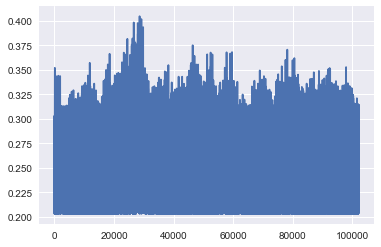

In [117]:
plt.plot(y_train_predict)

In [ ]:
plt.plot(y_train)

In [ ]:
y_train.argmax()

In [ ]:
df[y_train.argmax():y_train.argmax()+1]

### Alternative 1

#### Rolling training window = 8 years

In [ ]:
time_model(LogisticRegression(),8)

In [ ]:
time_model(RidgeClassifier(),8)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),8)        

In [ ]:
time_model(RandomForestRegressor(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),8)

#### Rolling training window = 5 years

In [ ]:
time_model(LogisticRegression(),5)

In [ ]:
time_model(RidgeClassifier(),5)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),5)        


#### Rolling training window = 2 years

In [ ]:
time_model(LogisticRegression(),2)

In [ ]:
time_model(RidgeClassifier(),2)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),2)        


### Alternative 2

#### Rolling training window = 8 years

In [ ]:
time_model(LogisticRegression(),8)

In [ ]:
time_model(RidgeClassifier(),8)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, n_jobs=-1, random_state=42),8)        


#### Rolling training window = 5 years

In [ ]:
time_model(LogisticRegression(),5)

In [ ]:
time_model(RidgeClassifier(),5)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, n_jobs=-1, random_state=42),5)        


#### Rolling training window = 2 years

In [ ]:
time_model(LogisticRegression(),2)

In [ ]:
time_model(RidgeClassifier(),2)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, n_jobs=-1, random_state=42),2)        


### Alternative 3

#### Rolling training window = 8 years

In [ ]:
time_model(LogisticRegression(),8)

In [ ]:
df.head()

In [ ]:
df=df_backup.copy()

In [ ]:
time_model(RidgeClassifier(),8)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),8)        


#### Rolling training window = 5 years

In [ ]:
time_model(LogisticRegression(),5)

In [ ]:
time_model(RidgeClassifier(),5)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),5)        


#### Rolling training window = 2 years

In [ ]:
time_model(LogisticRegression(),2)

In [ ]:
time_model(RidgeClassifier(),2)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),2)        
